In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [14]:
grafo = nx.read_gexf("grafo.gexf")

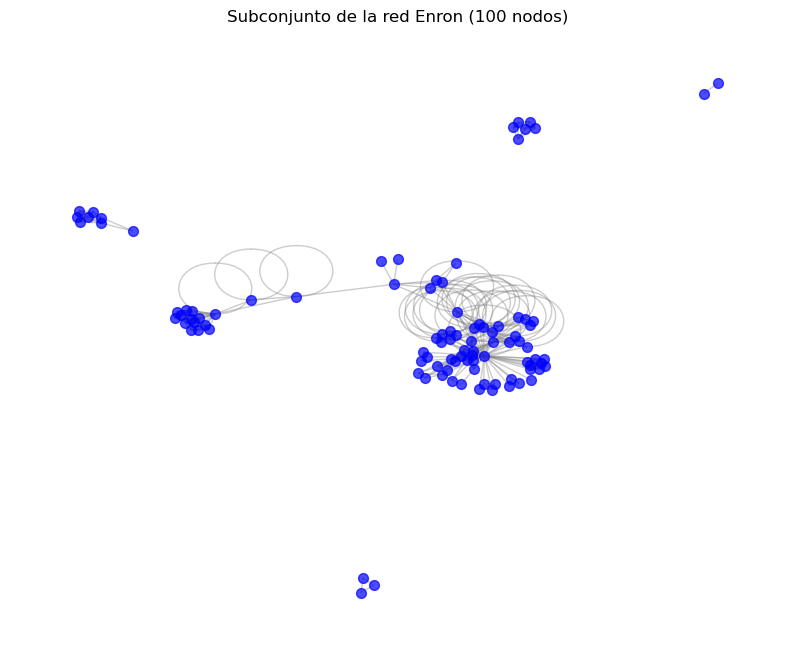

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(grafo, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(grafo, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(grafo, pos, edge_color='gray', alpha=0.4)
plt.axis('off')
plt.title("Red Marvel Comics")
plt.show()

/var/folders/f6/1hghhh1x5nq6k8k89mc457j40000gq/T/ipykernel_16549/3128061237.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


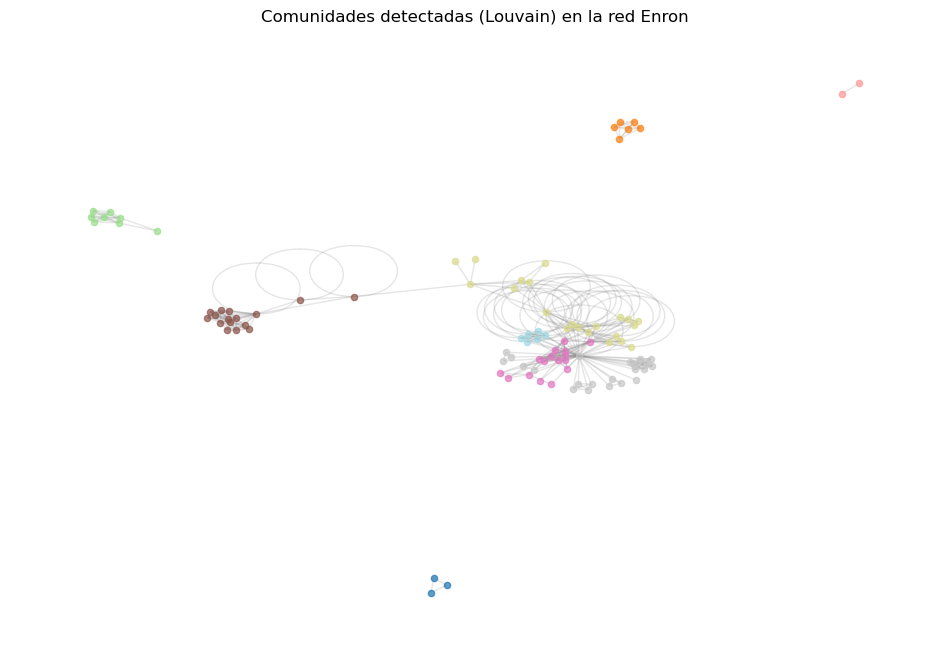

In [16]:
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Detectar comunidades con Louvain
communities_louvain = community.louvain_communities(grafo)
# Número de comunidades detectadas
num_comunidades = len(communities_louvain)
# Posiciones de los nodos en el layout
pos = nx.spring_layout(grafo, seed=42)
# Crear figura
plt.figure(figsize=(12,8))
# Colormap para las comunidades
cmap = plt.cm.get_cmap('tab20', num_comunidades)
# Dibujar nodos por comunidad
for idx, comm_set in enumerate(communities_louvain):
    nx.draw_networkx_nodes(
        grafo,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )
nx.draw_networkx_edges(grafo, pos, alpha=0.2, edge_color='gray')
plt.axis('off')
plt.title("Comunidades detectadas (Louvain) en la red Enron")
plt.show()
